In [50]:
from Toy_Datasets.Toy_Datasets_2D import create_two_classes_circular_boundary
from Neural_Network import NLM,Classifier
import autograd.numpy as np
from sklearn.linear_model import LogisticRegression
from autograd import grad
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from autograd.misc.optimizers import adam
from sklearn.model_selection import train_test_split
from pandas import get_dummies
from Entropy import  epistemic_uncertainty, expected_aleatoric_uncertainty, total_uncertainty

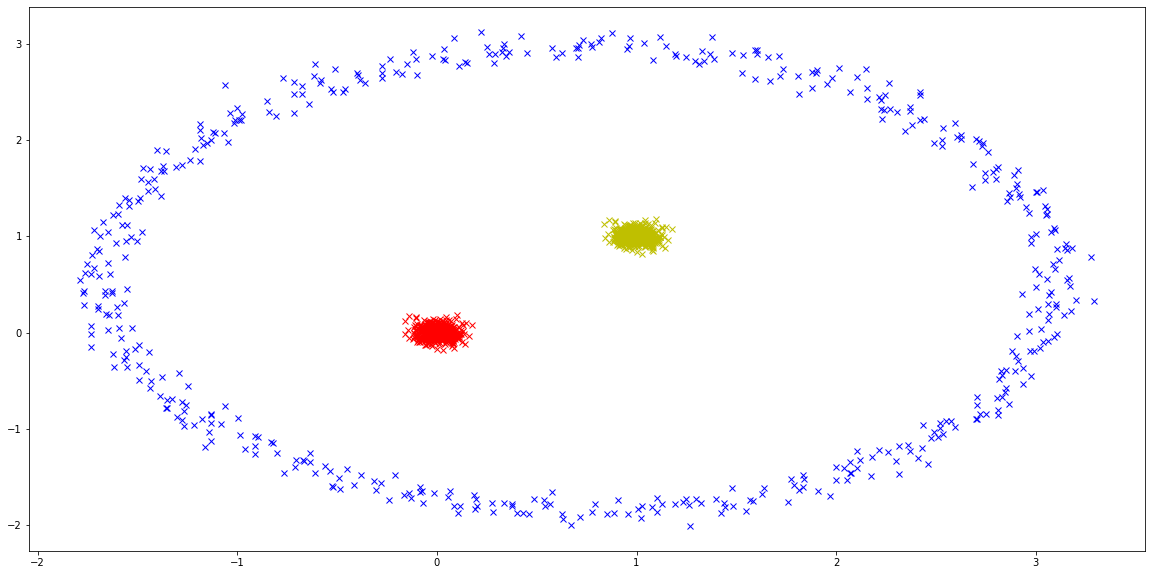

In [55]:
boundary, class1, class2=create_two_classes_circular_boundary(n=1000, noise_input=0.06, plot=True, distance=1, n_boundary=1000, noise_input_boundary=0.01)

In [56]:
# Transformation of x and y

In [57]:
print(len(boundary[0]))

500


In [58]:
X_try=np.hstack((boundary, class1, class2)).T
y_try= np.array([[k] * 500 for k in range(3)])
y_try=np.array(y_try).flatten()
print(X_try.shape,y_try.shape)

(1500, 2) (1500,)


In [73]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


###neural network model design choices
width = 5
hidden_layers = 4
input_dim = 2
output_dim = 3

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'prior': 'normal',
               'prior_parameters':{'mean': np.zeros(5), 'covariance_matrix': np.eye(5)},
               'likelihood': 'logistic',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nlm2 = NLM(architecture, random=random)
y_try_ = get_dummies(y_try).values
X_train_try, X_test_try, y_train_try, y_test_try = train_test_split(X_try,y_try_, train_size=0.9, random_state=random)

In [74]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':8000, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
#nlm.fit_MLE(x.T, y.reshape(1,-1), params)

nlm2.fit_MLE(X_train_try.T, y_train_try.T, params)

import pickle
filename = 'weights5000_two_classes_R1'
f=open(filename,"wb" )
pickle.dump(nlm2.weights,f)
f.close()

Iteration 0 lower bound 1.8358758783309552; gradient mag: 1.7568692798227636
Iteration 100 lower bound 1.2626448929728513; gradient mag: 1.6375708633688146
Iteration 200 lower bound 0.7761939415769777; gradient mag: 0.8218802396083453
Iteration 300 lower bound 0.5890683369257832; gradient mag: 0.5860973886829398
Iteration 400 lower bound 0.4606209043658098; gradient mag: 0.3751470637841152
Iteration 500 lower bound 0.23865322495343982; gradient mag: 0.3702164659367598
Iteration 600 lower bound 0.14059905007008816; gradient mag: 0.12688302881948224
Iteration 700 lower bound 0.10286671914222868; gradient mag: 0.09330606860217396
Iteration 800 lower bound 0.07642514128150023; gradient mag: 0.07368275738393999
Iteration 900 lower bound 0.05742993284361661; gradient mag: 0.06170990548188896
Iteration 1000 lower bound 0.036405746088576496; gradient mag: 0.06657178353479806
Iteration 1100 lower bound 0.008036666180217127; gradient mag: 0.0548585259045154
Iteration 1200 lower bound 0.002453606

In [75]:
from Toy_Datasets.Toy_Datasets import plot_decision_boundary

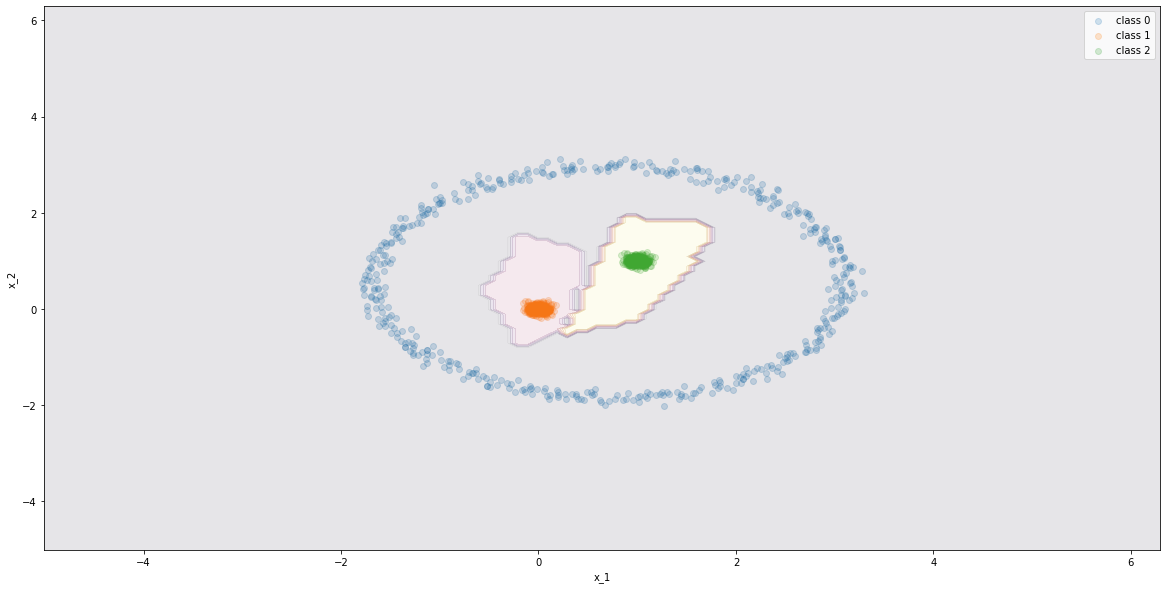

In [76]:
classifier2 = [Classifier(nlm2.weights, nlm2.forward)]
fig, ax = plt.subplots(1, figsize=(20, 10))
plot_decision_boundary(X_try, y_try_, classifier2, ax)
plt.show()

In [79]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':30000, 
          'random_restarts':1}
mac=True
models2=nlm2.sample_models(X_train_try.T, y_train_try.T, params, 300, mac)

Currently fitting a Neural Network for the Classification task
Iteration 0 lower bound 0.058921916661171796; gradient mag: 2.7765309975286473e-05
Iteration 100 lower bound 0.058921915153736765; gradient mag: 3.734086004994902e-05
Iteration 200 lower bound 0.058921916123733854; gradient mag: 7.280768264880398e-05
Iteration 300 lower bound 0.05892191556435179; gradient mag: 2.5045735587089793e-05
Iteration 400 lower bound 0.058921916307993566; gradient mag: 3.6515024998306666e-05
Iteration 500 lower bound 0.05892191943604635; gradient mag: 5.22028699492954e-05
Iteration 600 lower bound 0.058921917719940944; gradient mag: 3.142082460088468e-05
Iteration 700 lower bound 0.05892191765625199; gradient mag: 4.0041343913899304e-05
Iteration 800 lower bound 0.05892193830718002; gradient mag: 0.0002226116832967531
Iteration 900 lower bound 0.058921948132943394; gradient mag: 0.00029025513193211286
Iteration 1000 lower bound 0.05892195335928338; gradient mag: 0.00032017796275061783
Iteration 1100

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 28700
Interrupted at 28,699 [14%]: Average Loss = 4,736.9
Sequential sampling (2 chains in 1 job)
NUTS: [intercept, w]


Sampling 2 chains for 500 tune and 1_500 draw iterations (1_000 + 3_000 draws total) took 724 seconds.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
There were 36 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


(3000, 5, 3)
(3000, 3)
Posterior samples sampled !
(3000, 18)
Now, thanks to the posterior, we are going to create 300 different classification models


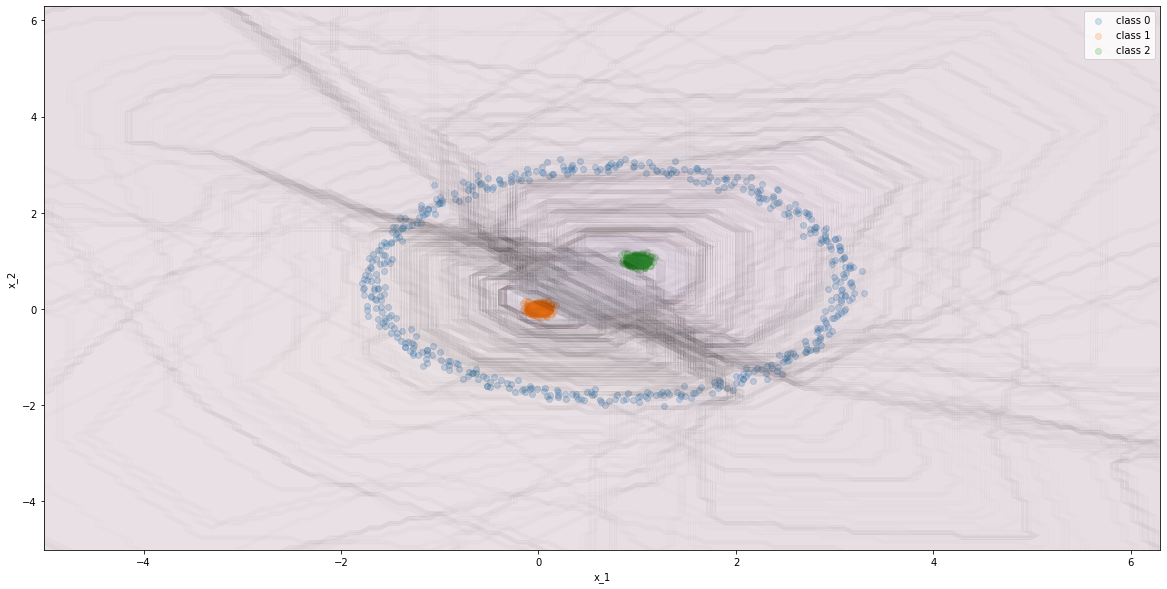

In [83]:
fig, ax = plt.subplots(1, figsize=(20, 10))
plot_decision_boundary(X_try, y_try_, models2, ax)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_classes_3000_R1')
plt.show()

In [82]:
pwd

'/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments'

# Experiment 2:

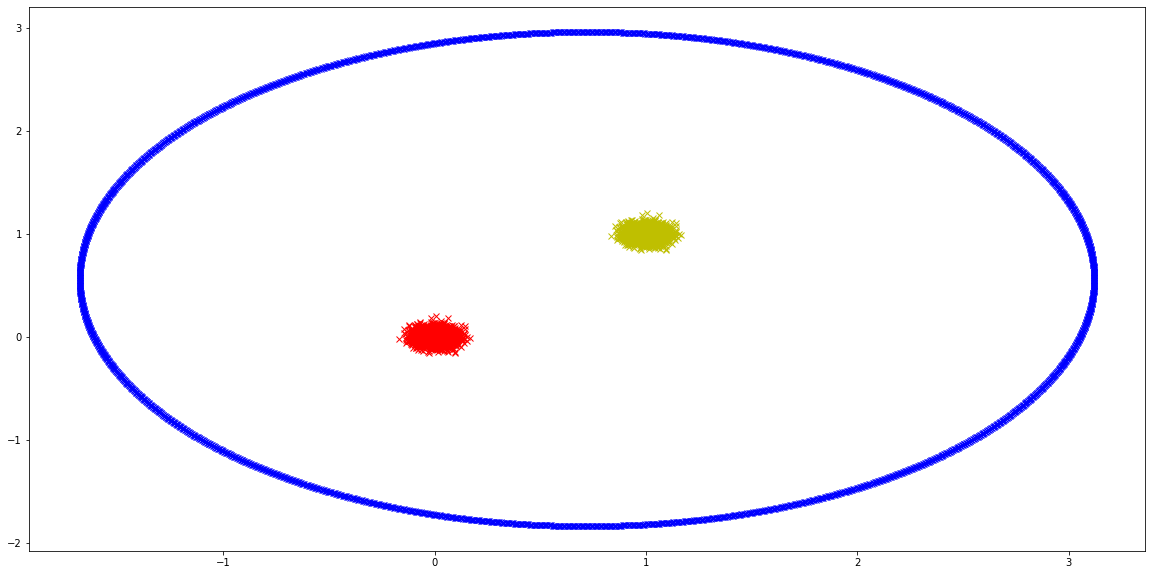

In [87]:
boundary, class1, class2=create_two_classes_circular_boundary(n=5000, noise_input=0.05, plot=True, distance=1, n_boundary=5000, noise_input_boundary=0.0)

In [88]:
print(len(boundary[0]))

2500


In [90]:
X_try=np.hstack((boundary, class1, class2)).T
y_try= np.array([[k] * 2500 for k in range(3)])
y_try=np.array(y_try).flatten()
print(X_try.shape,y_try.shape)

(7500, 2) (7500,)


In [91]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


###neural network model design choices
width = 5
hidden_layers = 4
input_dim = 2
output_dim = 3

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'prior': 'normal',
               'prior_parameters':{'mean': np.zeros(5), 'covariance_matrix': np.eye(5)},
               'likelihood': 'logistic',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nlm2 = NLM(architecture, random=random)
y_try_ = get_dummies(y_try).values
X_train_try, X_test_try, y_train_try, y_test_try = train_test_split(X_try,y_try_, train_size=0.9, random_state=random)

In [92]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':8000, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
#nlm.fit_MLE(x.T, y.reshape(1,-1), params)

nlm2.fit_MLE(X_train_try.T, y_train_try.T, params)

import pickle
filename = 'weights5000_two_classes_R2'
f=open(filename,"wb" )
pickle.dump(nlm2.weights,f)
f.close()

Iteration 0 lower bound 1.836738362534219; gradient mag: 1.7730131002029608
Iteration 100 lower bound 1.2652077759783993; gradient mag: 1.6219057318429104
Iteration 200 lower bound 0.7701255753713225; gradient mag: 0.842049439832097
Iteration 300 lower bound 0.5671806181290202; gradient mag: 0.6006972834138248
Iteration 400 lower bound 0.4401321052821101; gradient mag: 0.3769518026115091
Iteration 500 lower bound 0.2336562479728549; gradient mag: 0.3266725571348609
Iteration 600 lower bound 0.15069968420118837; gradient mag: 0.17750457656195373
Iteration 700 lower bound 0.11406850467631621; gradient mag: 0.09719475391490219
Iteration 800 lower bound 0.0920190201102385; gradient mag: 0.08397937520618377
Iteration 900 lower bound 0.07908703382910152; gradient mag: 0.06845473527076708
Iteration 1000 lower bound 0.07066000833638271; gradient mag: 0.051795999338781214
Iteration 1100 lower bound 0.06409685574029468; gradient mag: 0.04371250551109497
Iteration 1200 lower bound 0.0432902708044

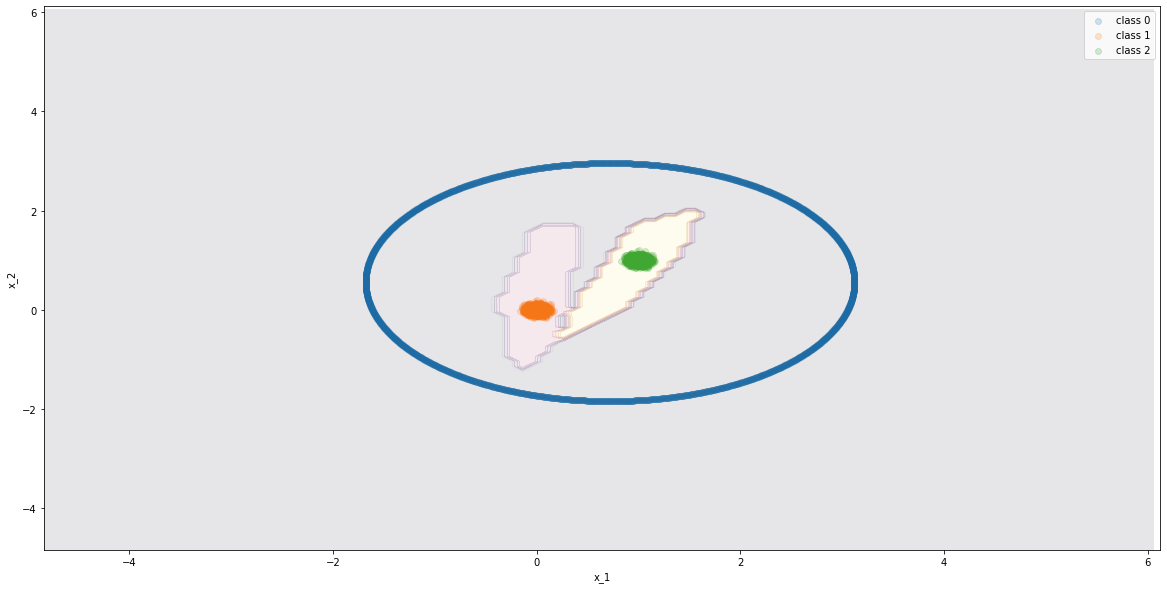

In [93]:
classifier2 = [Classifier(nlm2.weights, nlm2.forward)]
fig, ax = plt.subplots(1, figsize=(20, 10))
plot_decision_boundary(X_try, y_try_, classifier2, ax)
plt.show()

In [95]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':15000, 
          'random_restarts':1}
mac=True
models2=nlm2.sample_models(X_train_try.T, y_train_try.T, params, 300, mac)

Currently fitting a Neural Network for the Classification task
Iteration 0 lower bound 0.05875157477435391; gradient mag: 1.8117316726862517e-05
Iteration 100 lower bound 0.058751566635218695; gradient mag: 4.356148468936499e-06
Iteration 200 lower bound 0.05875156624231532; gradient mag: 2.206184069682972e-05
Iteration 300 lower bound 0.058751566255179834; gradient mag: 3.0225303380365937e-05
Iteration 400 lower bound 0.058751580565812464; gradient mag: 0.00021412897367619835
Iteration 500 lower bound 0.058751589808478395; gradient mag: 0.0002655624934181838
Iteration 600 lower bound 0.05875156738161088; gradient mag: 5.7626131864366946e-05
Iteration 700 lower bound 0.05875159820435798; gradient mag: 0.00030162268979661683
Iteration 800 lower bound 0.05875157045103976; gradient mag: 0.00011105628427398336
Iteration 900 lower bound 0.05875157888308365; gradient mag: 0.00019703116281917624
Iteration 1000 lower bound 0.058751618717947235; gradient mag: 0.00039542656530653904
Iteration 11

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 35200
Interrupted at 35,199 [17%]: Average Loss = 21,508
Sequential sampling (2 chains in 1 job)
NUTS: [intercept, w]


Sampling 2 chains for 500 tune and 1_500 draw iterations (1_000 + 3_000 draws total) took 11237 seconds.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


(3000, 5, 3)
(3000, 3)
Posterior samples sampled !
(3000, 18)
Now, thanks to the posterior, we are going to create 300 different classification models


In [99]:
len(models2[150:300])

150

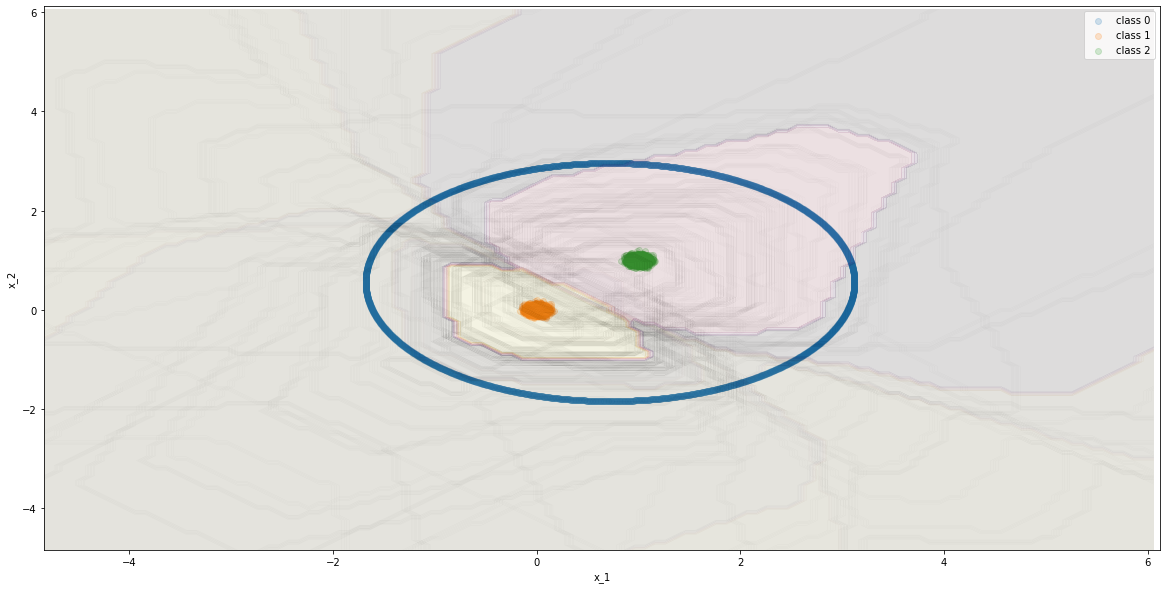

In [103]:
fig, ax = plt.subplots(1, figsize=(20, 10))
plot_decision_boundary(X_try, y_try_, models2[150:250], ax)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_classes_1500_R2')
plt.show()

# Experiment 3:

In [198]:
from Toy_Datasets.Toy_Datasets_2D import two_moon_circular_boundary

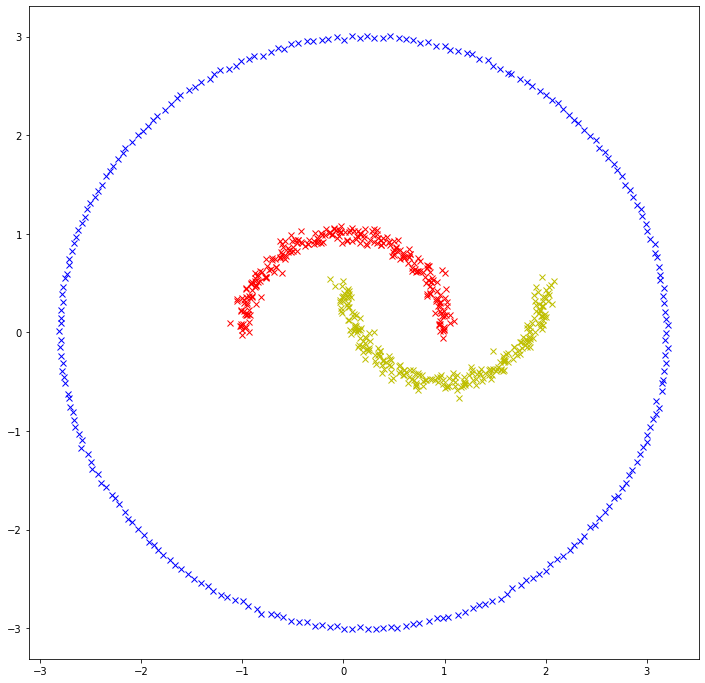

In [199]:
boundary, class1, class2=two_moon_circular_boundary(n=500, noise_input=0.05, plot=True, distance=1, n_boundary=500, noise_input_boundary=0.001)

In [200]:
len(boundary[1])

250

In [201]:
X_try=np.hstack((boundary, class1, class2)).T
y_try= np.array([[k] * 250 for k in range(3)])
y_try=np.array(y_try).flatten()
print(X_try.shape,y_try.shape)

(750, 2) (750,)


In [202]:
y_try

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [203]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


###neural network model design choices
width = 7
hidden_layers = 4
input_dim = 2
output_dim = 3

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'prior': 'normal',
               'prior_parameters':{'mean': np.zeros(5), 'covariance_matrix': np.eye(5)},
               'likelihood': 'logistic',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nlm2 = NLM(architecture, random=random)
y_try_ = get_dummies(y_try).values
X_train_try, X_test_try, y_train_try, y_test_try = train_test_split(X_try,y_try_, train_size=0.9, random_state=random)

In [204]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':8000, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
#nlm.fit_MLE(x.T, y.reshape(1,-1), params)

nlm2.fit_MLE(X_train_try.T, y_train_try.T, params)

import pickle
filename = 'weights5000_two_moons_R3'
f=open(filename,"wb" )
pickle.dump(nlm2.weights,f)
f.close()

Iteration 0 lower bound 8.894602100301517; gradient mag: 11.547196112056433
Iteration 100 lower bound 5.845304477532717; gradient mag: 2.0016291383139406
Iteration 200 lower bound 1.2924918030134072; gradient mag: 4.5040800306573505
Iteration 300 lower bound 0.592271513335073; gradient mag: 0.6448484364348961
Iteration 400 lower bound 0.48954377198424387; gradient mag: 0.40026369682194923
Iteration 500 lower bound 0.4353605743319622; gradient mag: 0.3210592317998467
Iteration 600 lower bound 0.3909753366316277; gradient mag: 0.3082339304247319
Iteration 700 lower bound 0.3446411145277853; gradient mag: 0.31158486588083995
Iteration 800 lower bound 0.29971393530951973; gradient mag: 0.29167742806999913
Iteration 900 lower bound 0.2588844484771123; gradient mag: 0.2699863975681392
Iteration 1000 lower bound 0.22388702598573082; gradient mag: 0.2360914728986268
Iteration 1100 lower bound 0.18512202051745677; gradient mag: 0.22076814715256707
Iteration 1200 lower bound 0.15891049336199733;

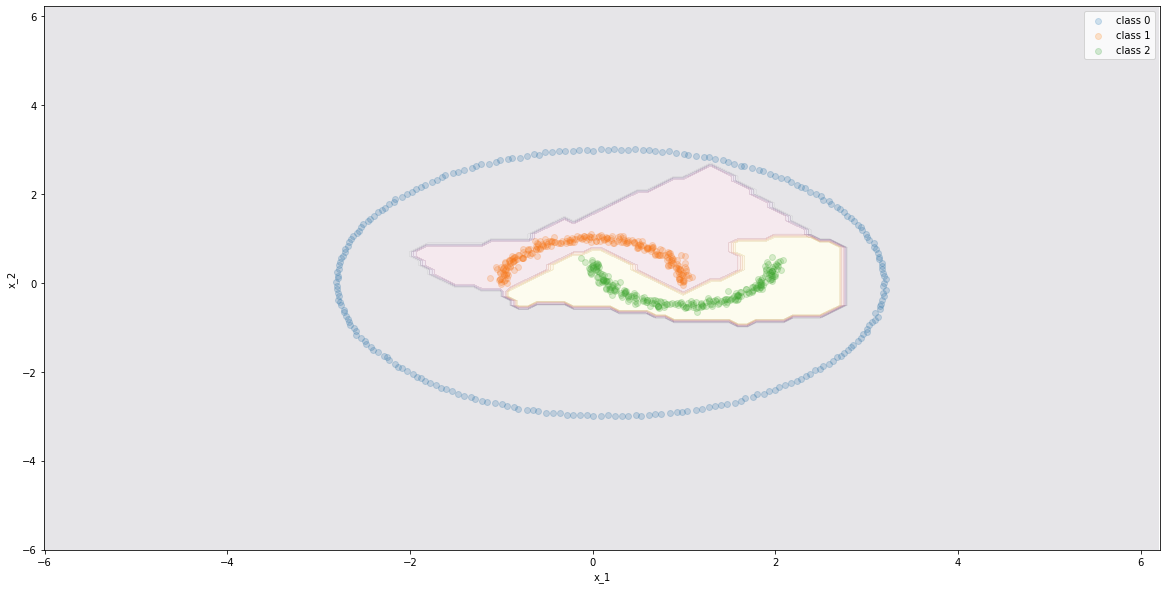

In [205]:
classifier2 = [Classifier(nlm2.weights, nlm2.forward)]
fig, ax = plt.subplots(1, figsize=(20, 10))
plot_decision_boundary(X_try, y_try_, classifier2, ax)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_moons_8000_R5_MLE')
plt.show()

In [206]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':5000, 
          'random_restarts':1}
mac=True
models2=nlm2.sample_models(X_train_try.T, y_train_try.T, params, 200, mac)

Currently fitting a Neural Network for the Classification task
Iteration 0 lower bound 0.17279484533875325; gradient mag: 0.00989756629928816
Iteration 100 lower bound 0.1620970015785292; gradient mag: 0.00977192196027435
Iteration 200 lower bound 0.1523402916690519; gradient mag: 0.009454484024428942
Iteration 300 lower bound 0.14341139188333543; gradient mag: 0.009336957395525997
Iteration 400 lower bound 0.13520563060614924; gradient mag: 0.008920599092031353
Iteration 500 lower bound 0.12786092882158784; gradient mag: 0.00898632354143689
Iteration 600 lower bound 0.12125777238993728; gradient mag: 0.008325954493182115
Iteration 700 lower bound 0.11532743410333869; gradient mag: 0.0089955445207569
Iteration 800 lower bound 0.11011140333370095; gradient mag: 0.008180363115225513
Iteration 900 lower bound 0.10542044393443557; gradient mag: 0.007553826831831191
Iteration 1000 lower bound 0.10121218058862085; gradient mag: 0.007355059413296887
Iteration 1100 lower bound 0.09750997523604

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 24000
Interrupted at 23,999 [11%]: Average Loss = 1,860.9
Sequential sampling (2 chains in 1 job)
NUTS: [intercept, w]


Sampling 2 chains for 500 tune and 1_500 draw iterations (1_000 + 3_000 draws total) took 233 seconds.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 45 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


(3000, 7, 3)
(3000, 3)
Posterior samples sampled !
(3000, 24)
Now, thanks to the posterior, we are going to create 200 different classification models


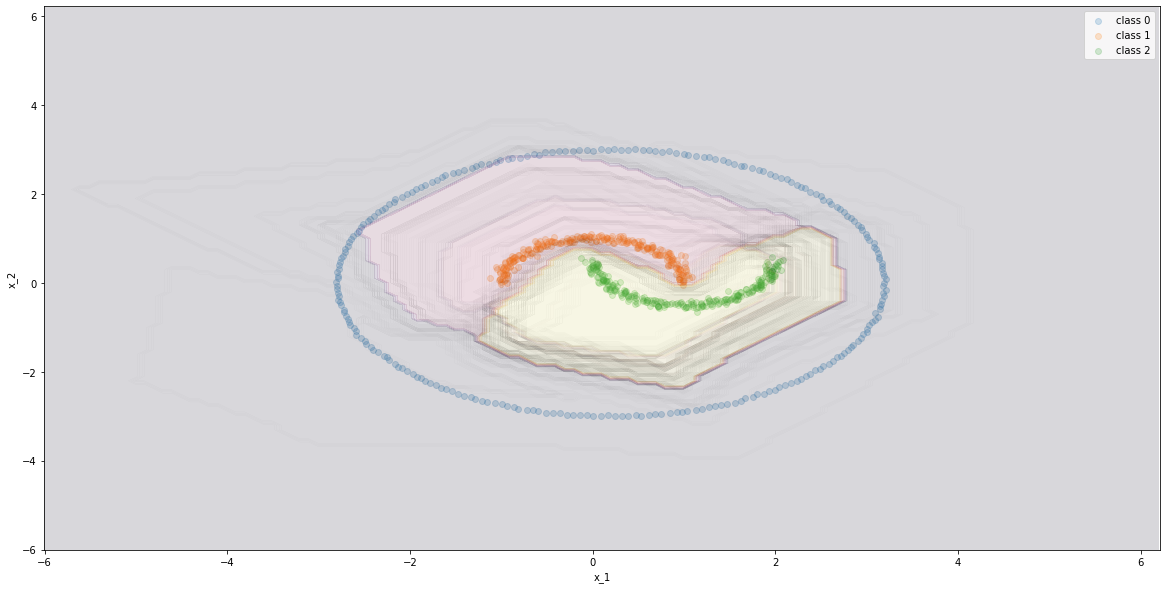

In [207]:
fig, ax = plt.subplots(1, figsize=(20, 10))
plot_decision_boundary(X_try, y_try_, models2[114:164], ax)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_moons_1500_R6_NLM')
plt.show()